In [12]:
import sys
sys.path.append("../pre-processing")
sys.path.append("../pre-processing/methods")
sys.path.append("../learning_model")
from parse import parse
from freqDomain import *
from timeDomain import *
from prepare_data import prepare_data
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle
from utils import precision_recall_f1
from sklearn.metrics import accuracy_score

In [2]:
test = pickle.load(open("C:/Users/levinwv1/Downloads/concat_test.MultFeat"))
train = pickle.load(open("C:/Users/levinwv1/Downloads/concat_train.MultFeat"))
test_x = test[0]
test_y = test[1]
train_x = train[0]
train_y = train[1]

In [5]:
train_x = prepare([train_x])[0]

In [4]:
window = 225
def prepare(data):
    #this is the data we'll be returning
    two_dimension_data = np.zeros((len(data), len(data[0]), 3))
    for j in range(len(data)):
        for i in range(len(data[j])):

            #the first feature is simply the max of the FFT
            two_dimension_data[j][i][0] = np.max(data[j][i])
        for k in range(2*window, len(data[j])):

            #the second feature is the tangent slope
            two_dimension_data[j][k][1] = ((two_dimension_data[j][k][0] - two_dimension_data[j][k - window / 2][0])/(window / 2))

            #the third feature is the timepoint in comparison to its local mean
            local = two_dimension_data[j][k - window / 2: k, 0]
            two_dimension_data[j][k][2] = (two_dimension_data[j][k][0] - np.mean(local))

    #get rid of nan values
    two_dimension_data = get_rid_nan_values(two_dimension_data)

    #smooth
    two_dimension_data = savgol(two_dimension_data)

    #normalize about x axis
    #two_dimension_data = normalize(two_dimension_data, background_value = background_value)


    return two_dimension_data


In [16]:
def accuracy(data, labels):
    accuracy = accuracy_score(data, labels, normalize = True)
    print 'Accuracy:' + str(accuracy)
    return accuracy

In [162]:
normal = normalize([train_x], percentile = 20, window = 500, background_value = 40)[0]

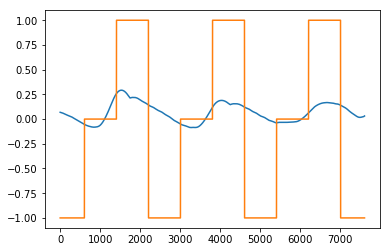

In [163]:
plt.plot(normal[50000:, 0] / 200)
plt.plot(train_y[50000:])
plt.show()

In [148]:
predictions = []
for i in range(len(normal)):
    if normal[i, 0] > 0 and np.abs(normal[i, 2]) > 3:
        if normal[i, 2] > 0:
            predictions.append(normal[i, 0])
        else:
            predictions.append(-1 * normal[i, 0])
    else:
        predictions.append(0)

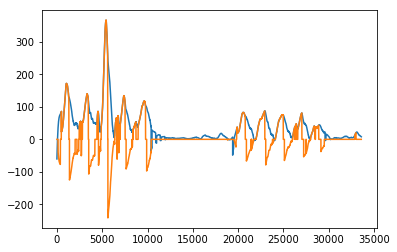

In [149]:
plt.plot(normal[:, 0])
plt.plot(predictions[:])

plt.show()

In [164]:
concat = [normal, train_y]

In [166]:
len(concat[0])

57606

In [167]:
pickle.dump(concat, open("C:/Users/levinwv1/Downloads/concat_train.MultFeat", "wb"))